<a href="https://colab.research.google.com/github/seoho0529/TensorFlow/blob/main/tf20nlp_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# word embedding : 단어를 벡터로 표현하는 방식 중 하나. 희소표현과 밀집표현 등이 있다.
# 비정형화된 데이터를 숫자로 바꿔서 컴퓨터가 이해하는 형태로 번역하는 작업

import numpy as np

# 데이터 인코딩
print('레이블 인코딩')
datas = ['python', 'lan', 'program', 'computer', 'safe']
datas.sort()  # 원본데이터가 정렬.. sorted : 정렬된 리스트를 반환
print(datas)

# for 사용
values = []
for x in range(len(datas)):
  values.append(x)

print(values, type(values))

print('one-hot-incoding')
onehot = np.eye(len(values))
print(onehot, type(onehot))

print('인코딩 지원 클래스')
from sklearn.preprocessing import LabelEncoder
datas = ['python', 'lan', 'program', 'computer', 'safe']
encoder = LabelEncoder().fit(datas)
values = encoder.transform(datas)
print(values, type(values))

print('원핫인코딩 지원 클래스')
from sklearn.preprocessing import OneHotEncoder
labels = values.reshape(-1,1)
print(labels, labels.shape)
onehot = OneHotEncoder().fit(labels)
onehotValues = onehot.transform(labels)
print(onehotValues.toarray())

레이블 인코딩
['computer', 'lan', 'program', 'python', 'safe']
[0, 1, 2, 3, 4] <class 'list'>
one-hot-incoding
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]] <class 'numpy.ndarray'>
인코딩 지원 클래스
[3 1 2 0 4] <class 'numpy.ndarray'>
원핫인코딩 지원 클래스
[[3]
 [1]
 [2]
 [0]
 [4]] (5, 1)
[[0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


Word2Vec<vocab=5, vector_size=50, alpha=0.025>
word_vectors :  KeyedVectors<vector_size=50, 5 keys>
{'safe': 0, 'computer': 1, 'program': 2, 'lan': 3, 'python': 4}
dict_keys(['safe', 'computer', 'program', 'lan', 'python'])
dict_values([0, 1, 2, 3, 4])
[-1.0724545e-03  4.7286271e-04  1.0206699e-02  1.8018546e-02
 -1.8605899e-02 -1.4233618e-02  1.2917745e-02  1.7945977e-02
 -1.0030856e-02 -7.5267432e-03  1.4761009e-02 -3.0669428e-03
 -9.0732267e-03  1.3108104e-02 -9.7203208e-03 -3.6320353e-03
  5.7531595e-03  1.9837476e-03 -1.6570430e-02 -1.8897636e-02
  1.4623532e-02  1.0140524e-02  1.3515387e-02  1.5257311e-03
  1.2701781e-02 -6.8107317e-03 -1.8928028e-03  1.1537147e-02
 -1.5043275e-02 -7.8722071e-03 -1.5023164e-02 -1.8600845e-03
  1.9076237e-02 -1.4638334e-02 -4.6675373e-03 -3.8754821e-03
  1.6154874e-02 -1.1861792e-02  9.0324880e-05 -9.5074680e-03
 -1.9207101e-02  1.0014586e-02 -1.7519170e-02 -8.7836506e-03
 -7.0199967e-05 -5.9236289e-04 -1.5322480e-02  1.9229487e-02
  9.9641159e-03

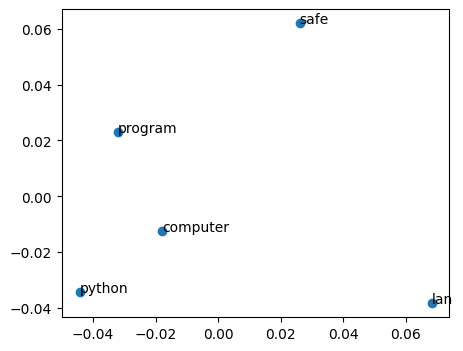

In [25]:
from gensim.models import word2vec  # word2vec : 단어의 의미를 다차원 공간에 실수로 벡터화 하는 분산표현기법 중 하나. 단어 간 유사성 표현
sentence = [['python','lan', 'program', 'computer', 'safe']]
model = word2vec.Word2Vec(sentence, vector_size=50, min_count=1, sg=0)  # vector_size:벡터의 차원을 지정 , min_count:단어빈도수, sg:cbow인지 skip-gram인지
print(model)                       # 차원을 늘려주면 많은 단어들을 사용가능
word_vectors = model.wv  # 단어벡터를 생성 | 벡터는 1차원!
print('word_vectors : ', word_vectors)
print(word_vectors.key_to_index)  # 사전 순이 아닌 그냥 순서대로 인덱스 부여
print(word_vectors.key_to_index.keys())
print(word_vectors.key_to_index.values())

vocabs = word_vectors.key_to_index.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]
print(word_vectors_list[0], len(word_vectors_list[0]))

# 단어간 유사도 측정 : 두 단어의 유사도를 코사인값으로 표현 - 코사인 유사도
print(word_vectors.similarity(w1='python', w2='computer'))  # 0.124862544 : 같은 방향(positive)
print(word_vectors.similarity(w1='python', w2='safe'))      # -0.11821282 : 다른 방향(negative)
print(word_vectors.most_similar(positive='computer'))

# 시각화
import matplotlib.pyplot as plt
def plotFunc(vocabs, x, y):
  plt.figure(figsize=(5, 4))
  plt.scatter(x, y)
  for i, v in enumerate(vocabs):
    plt.annotate(v, xy=(x[i], y[i]))

from sklearn.decomposition import PCA
pac = PCA(n_components=2)
xys = pac.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]
plotFunc(vocabs, xs, ys)
plt.show()